# Análise Exploratória - Mapeamento de Criminalidade no Ceará

Realizar uma análise exploratória de dados (EDA) de crimes por arma de fogo, roubos e homicídios

## Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregar o dataset de 2015 até hoje, exceto os 30 dias mais recentes

In [2]:
# Separar as colunas desejáveis do conjunto de dados
colunas = ['MUNICIPIO', 'NATUREZA DO FATO', 'ARMA UTILIZADA', 'DATA DA MORTE', 'SEXO', 'IDADE']

# Carregar dataset e determinar as variáveis categóricas
df_carga = pd.read_csv(r'../data/processed/sspds-ce/dataset_consolidado.csv', sep=";", usecols=colunas, 
    dtype={
        'MUNICIPIO':'category', 'NATUREZA DO FATO':'category', 'ARMA UTILIZADA':'category', 
        'SEXO':'category', 'IDADE':'category' })

## Formatar e converter colunas

In [3]:
# Dividir o dataset entre os formatos de data #1 e #2
df_data1 = pd.DataFrame(df_carga[df_carga['DATA DA MORTE'].str.contains("-")])
df_data2 = pd.DataFrame(df_carga[df_carga['DATA DA MORTE'].str.contains("/")])

# Quebrar em colunas para ajustar a formatação #1
df_data1[['D', 'M', 'Y']] = df_data1['DATA DA MORTE'].str.split('-', 2, expand=True)
df_data1['D'] = df_data1['D'].str.zfill(2)
df_data1['M'] = df_data1['M'].str.capitalize()
df_data1['M'] = df_data1['M'].replace('Fev', 'Feb').replace('Mai', 'May')
df_data1['Y'] = df_data1['Y'].replace('15', '2015')
# Concatenar o formato #1
df_data1['DATA DA MORTE'] = df_data1['D']+"-"+df_data1['M']+"-"+df_data1['Y']

# Coverter dataset formato #1
df_data1['DATA'] = pd.to_datetime(df_data1['DATA DA MORTE'], format="%d-%b-%Y")
# Coverter dataset formato #2
df_data2['DATA'] = pd.to_datetime(df_data2['DATA DA MORTE'], format="%d/%m/%Y")

# Eliminar colunas sem uso
df_data1 = df_data1.drop(columns=['D','M','Y','DATA DA MORTE'])
df_data2 = df_data2.drop(columns=['DATA DA MORTE'])

# Juntar dataframes em um novo consolidado
df_consolidado = pd.concat([df_data1, df_data2])

In [4]:
# Substituir valores vazios de IDADE, por NaN para o tipo categórico
df_consolidado['IDADE'] = df_consolidado['IDADE'].replace('-', np.nan)
df_consolidado['IDADE'] = df_consolidado['IDADE'].astype('category')
df_consolidado['IDADE'].unique() # Identificar

['26', '18', '35', NaN, '13', ..., '90', '6', '91', '94', '86']
Length: 95
Categories (94, object): ['0', '1', '10', '11', ..., '90', '91', '93', '94']

In [5]:
# Verificar campos únicos de NATUREZA DO FATO, para formata-los
df_consolidado['NATUREZA DO FATO'] = df_consolidado['NATUREZA DO FATO'].replace('FEMINICÍDIO','FEMINICIDIO')
df_consolidado['NATUREZA DO FATO'] = df_consolidado['NATUREZA DO FATO'].replace('LESÃO CORPORAL SEGUIDA DE MORTE', 'LESAO CORPORAL SEGUIDA DE MORTE').replace('LESÃO CORPORAL SEGUIDO DE MORTE', 'LESAO CORPORAL SEGUIDA DE MORTE')
df_consolidado['NATUREZA DO FATO'] = df_consolidado['NATUREZA DO FATO'].astype('category')
df_consolidado['NATUREZA DO FATO'].unique() # Identificar

['HOMICIDIO DOLOSO', 'ROUBO SEGUIDO DE MORTE (LATROCINIO)', 'LESAO CORPORAL SEGUIDA DE MORTE', NaN, 'FEMINICIDIO', 'MORTE SUSPEITA']
Categories (5, object): ['FEMINICIDIO', 'HOMICIDIO DOLOSO', 'LESAO CORPORAL SEGUIDA DE MORTE', 'MORTE SUSPEITA', 'ROUBO SEGUIDO DE MORTE (LATROCINIO)']

In [6]:
# Verificar campos únicos de SEXO, para formata-los
df_consolidado['SEXO'] = df_consolidado['SEXO'].replace('-', np.nan)
df_consolidado['SEXO'] = df_consolidado['SEXO'].str.upper()
df_consolidado['SEXO'] = df_consolidado['SEXO'].replace('FEMININO','F').replace('FEMININO ','F').replace('F ','F')
df_consolidado['SEXO'] = df_consolidado['SEXO'].replace('MASCULINO','M').replace('MASCULINO ','M').replace('M ','M')
df_consolidado['SEXO'] = df_consolidado['SEXO'].replace('NÃO IDENTIFICADO', 'NAO IDENTIFICADO')
df_consolidado['SEXO'] = df_consolidado['SEXO'].replace('NÃO INFORMADO','NAO INFORMADO')
df_consolidado['SEXO'] = df_consolidado['SEXO'].astype('category')
df_consolidado['SEXO'].unique() # Identificar

['M', 'F', 'I', NaN, 'NAO IDENTIFICADO', 'NI', 'NAO INFORMADO']
Categories (6, object): ['F', 'I', 'M', 'NAO IDENTIFICADO', 'NAO INFORMADO', 'NI']

In [7]:
# Verificar o campo ARMA UTILIZADA por valores únicos
df_consolidado['ARMA UTILIZADA'] = df_consolidado['ARMA UTILIZADA'].str.upper()
df_consolidado['ARMA UTILIZADA'] = df_consolidado['ARMA UTILIZADA'].replace('OUTROS MEIOS', 'OUTROS').replace('ARMA OUTROS', 'OUTROS').replace('AMA OUTROS', 'OUTROS').replace('OUTRO', 'OUTROS')
df_consolidado['ARMA UTILIZADA'] = df_consolidado['ARMA UTILIZADA'].replace('NÃO INFORMAD', 'NI').replace('MEIO NÃO INFORMADO', 'NI').replace('NÃO INFORMADO', 'NI')
df_consolidado['ARMA UTILIZADA'] = df_consolidado['ARMA UTILIZADA'].replace('ARAMA BRANCA', 'ARMA BRANCA').replace('ARAMA DE BRANCA', 'ARMA BRANCA').replace('ARMA DE BRANCA', 'ARMA BRANCA')
df_consolidado['ARMA UTILIZADA'] = df_consolidado['ARMA UTILIZADA'].replace('ARMADE FOGO', 'ARMA DE FOGO').replace('ARAMA DE FOGO', 'ARMA DE FOGO')
df_consolidado['ARMA UTILIZADA'] = df_consolidado['ARMA UTILIZADA'].astype('category')
df_consolidado['ARMA UTILIZADA'].unique() # Identificar

['ARMA DE FOGO', 'ARMA BRANCA', 'OUTROS', 'NI', NaN]
Categories (4, object): ['ARMA BRANCA', 'ARMA DE FOGO', 'NI', 'OUTROS']

## Prévia e informações preliminares sobre o Dataset

In [9]:
# Prévia dos dados
df_consolidado.head(5)

,MUNICIPIO,NATUREZA DO FATO,ARMA UTILIZADA,SEXO,IDADE,DATA
0,Fortaleza,HOMICIDIO DOLOSO,ARMA DE FOGO,M,26,2015-12-01
1,Brejo Santo,HOMICIDIO DOLOSO,ARMA BRANCA,M,18,2015-12-01
2,Fortaleza,HOMICIDIO DOLOSO,ARMA DE FOGO,M,35,2015-12-01
3,Maracanaú,HOMICIDIO DOLOSO,ARMA DE FOGO,M,NaN,2015-12-01
4,Fortaleza,HOMICIDIO DOLOSO,ARMA DE FOGO,M,13,2015-12-01


In [10]:
# Informações preliminares sobre o dataset
print('Quantidade de linhas e colunas:', df_consolidado.shape)
print('Quantidade total de dados nulos:', df_consolidado.isna().sum().sum())

Quantidade de linhas e colunas: (25888, 6)
Quantidade total de dados nulos: 1431


In [11]:
# Tipo de dados
df_consolidado.dtypes

MUNICIPIO                 category
NATUREZA DO FATO          category
ARMA UTILIZADA            category
SEXO                      category
IDADE                     category
DATA                datetime64[ns]
dtype: object

### Onde estão os dados nulos?

In [12]:
df_consolidado.isna().sum()

MUNICIPIO              0
NATUREZA DO FATO       9
ARMA UTILIZADA        54
SEXO                   6
IDADE               1362
DATA                   0
dtype: int64

In [80]:
df_grupo_sexo = pd.DataFrame(df_consolidado.groupby('SEXO').size().to_frame('TOTAL').reset_index())
df_grupo_sexo = df_grupo_sexo.sort_values(by=['TOTAL'], ascending=False)
df_grupo_sexo

,SEXO,TOTAL
2,M,23759
0,F,2105
1,I,11
3,NAO IDENTIFICADO,5
4,NAO INFORMADO,1
5,NI,1


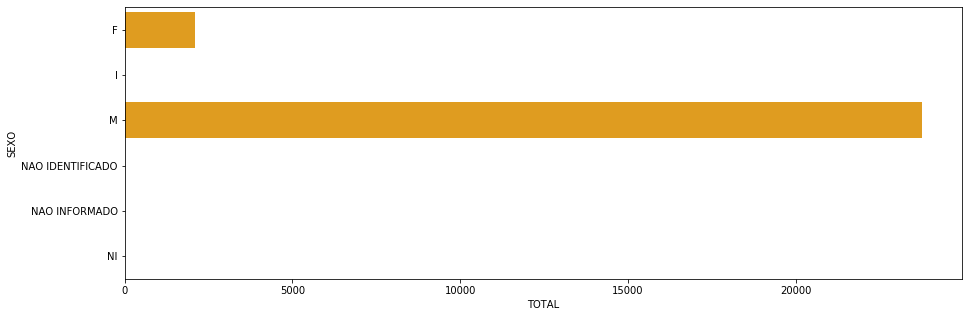

In [82]:
plt.figure(figsize=(15,5))
g = sns.barplot(data=df_grupo_sexo,
            x = 'TOTAL',
            y = 'SEXO',
            color='orange'
            )
plt.show()

In [ ]:
# Formatar o tipo data
df_estudo['data'] = pd.to_datetime(df_estudo['data'], format="%Y-%m-%d")

# Adicionar coluna formatada de vitimas por sexo
df_estudo['vitimas_homem']  = np.where(df_estudo['sexo_vitima'] == 'MASCULINO', 1, 0)
df_estudo['vitimas_mulher'] = np.where(df_estudo['sexo_vitima'] == 'FEMININO', 1, 0)

# Separar o código do AIS para testes
df_estudo['id_ais'] = df_estudo['ais'].str[4:].astype(int)

df_estudo[:3]

### Agrupar ocorrências por mês
Ocorrências sumarizadas por mês ao longo do tempo, e maiores vítimas.

> As maiores vítimas são homens, e existe um gap de coleta de dados de 2020, entre os meses março à dezembro, das bases extraídas

In [ ]:
# Agrupar por mês em novo Dataframe
agrupamento_mes = df_estudo.resample('M', on='data')

df_periodo_m = pd.DataFrame()
df_periodo_m['total_vitimas'] = agrupamento_mes['dummy_contagem'].count()
df_periodo_m['total_vitimas_homem']  = agrupamento_mes['vitimas_homem'].sum()
df_periodo_m['total_vitimas_mulher'] = agrupamento_mes['vitimas_mulher'].sum()
df_periodo_m['mediana_idade'] = agrupamento_mes['idade_vitima'].median()

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_periodo_m,
            x = 'data',
            y = 'total_vitimas'
            )
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_periodo_m, color='orange', orient='h')
plt.show()

### Agrupar ocorrências por natureza do fato
Mostrar o volume de ocorrências por natureza do fato

> A principal natureza do óbito é de Homicídio Doloso

In [ ]:
# Agrupar por natureza
agrupamento_natureza = pd.DataFrame([ df_estudo.groupby(['natureza_fato']).size() ])
agrupamento_natureza

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=agrupamento_natureza, color='orange', orient='h',)
plt.show()

### Agrupar ocorrências por município
Tentativa de encontrar desvio padrão de ocorrências por município de maior gravidade

In [ ]:
# Agrupar por município
agrupamento_municipio = pd.DataFrame([ df_estudo.groupby(['municipio']).size() ])
agrupamento_municipio

In [ ]:
# plt.figure(figsize=(15,5))
# sns.barplot(data=agrupamento_municipio, color='blue', orient='h',)
# plt.show()

### Matriz de correlação
Exigir grau de correlação das variáveis numéricas montadas

In [ ]:
df_estudo.corr()